## Imports

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Read data

In [110]:
df = pd.read_csv('input/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Compute pairwise correlation of columns

<Axes: >

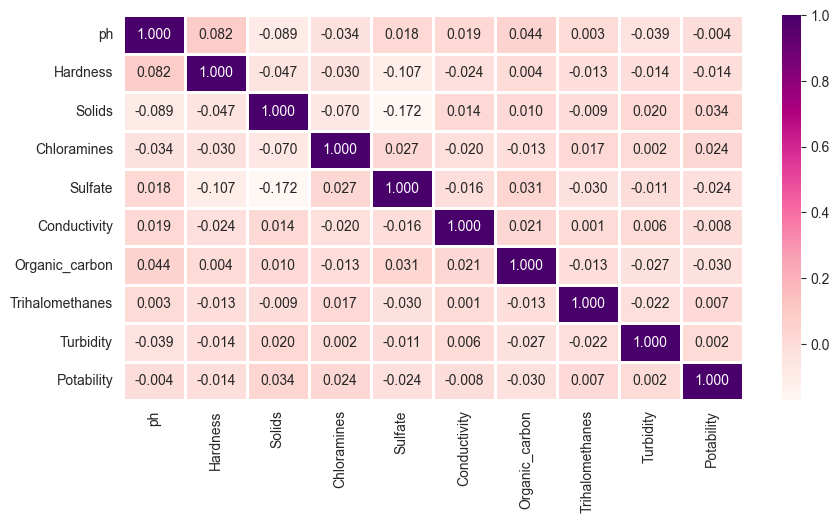

In [111]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="RdPu",fmt='.3f',linewidths=.8)

## Count of duplicated values

Any Duplicate Value: 0


<Axes: >

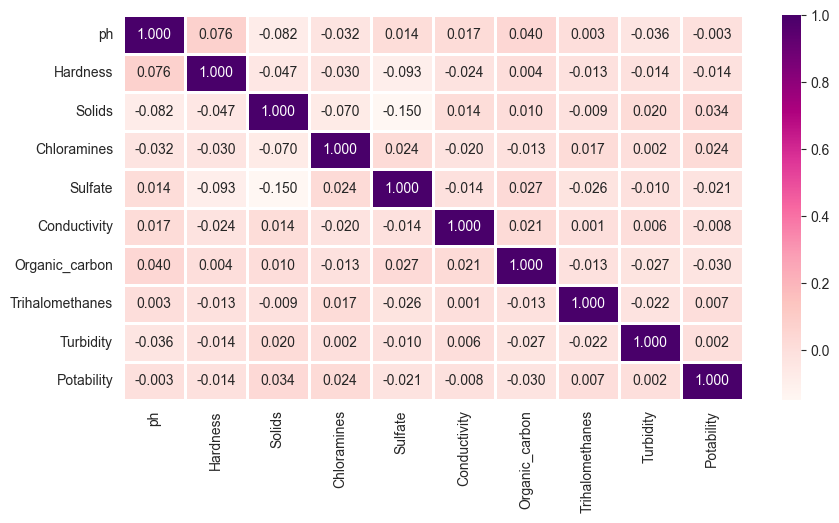

In [130]:
dup = df.duplicated().sum()
print('Any Duplicate Value:',dup)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = scaler.fit_transform(df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']])

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="RdPu",fmt='.3f',linewidths=.8)

## Count of NaN values

In [113]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Filling NaN objects with mean

In [114]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

# df.fillna(df.mean())

## Count of NaN values after filling

In [115]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [116]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0


## Histogram of potability

<Axes: xlabel='Potability', ylabel='Count'>

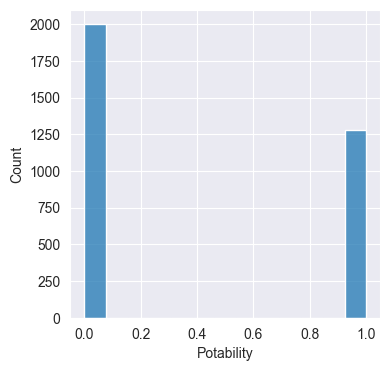

In [117]:
plt.rcParams['figure.figsize'] = [4,4]
sns.histplot(df['Potability'])

## Pairwise relationship in dataset

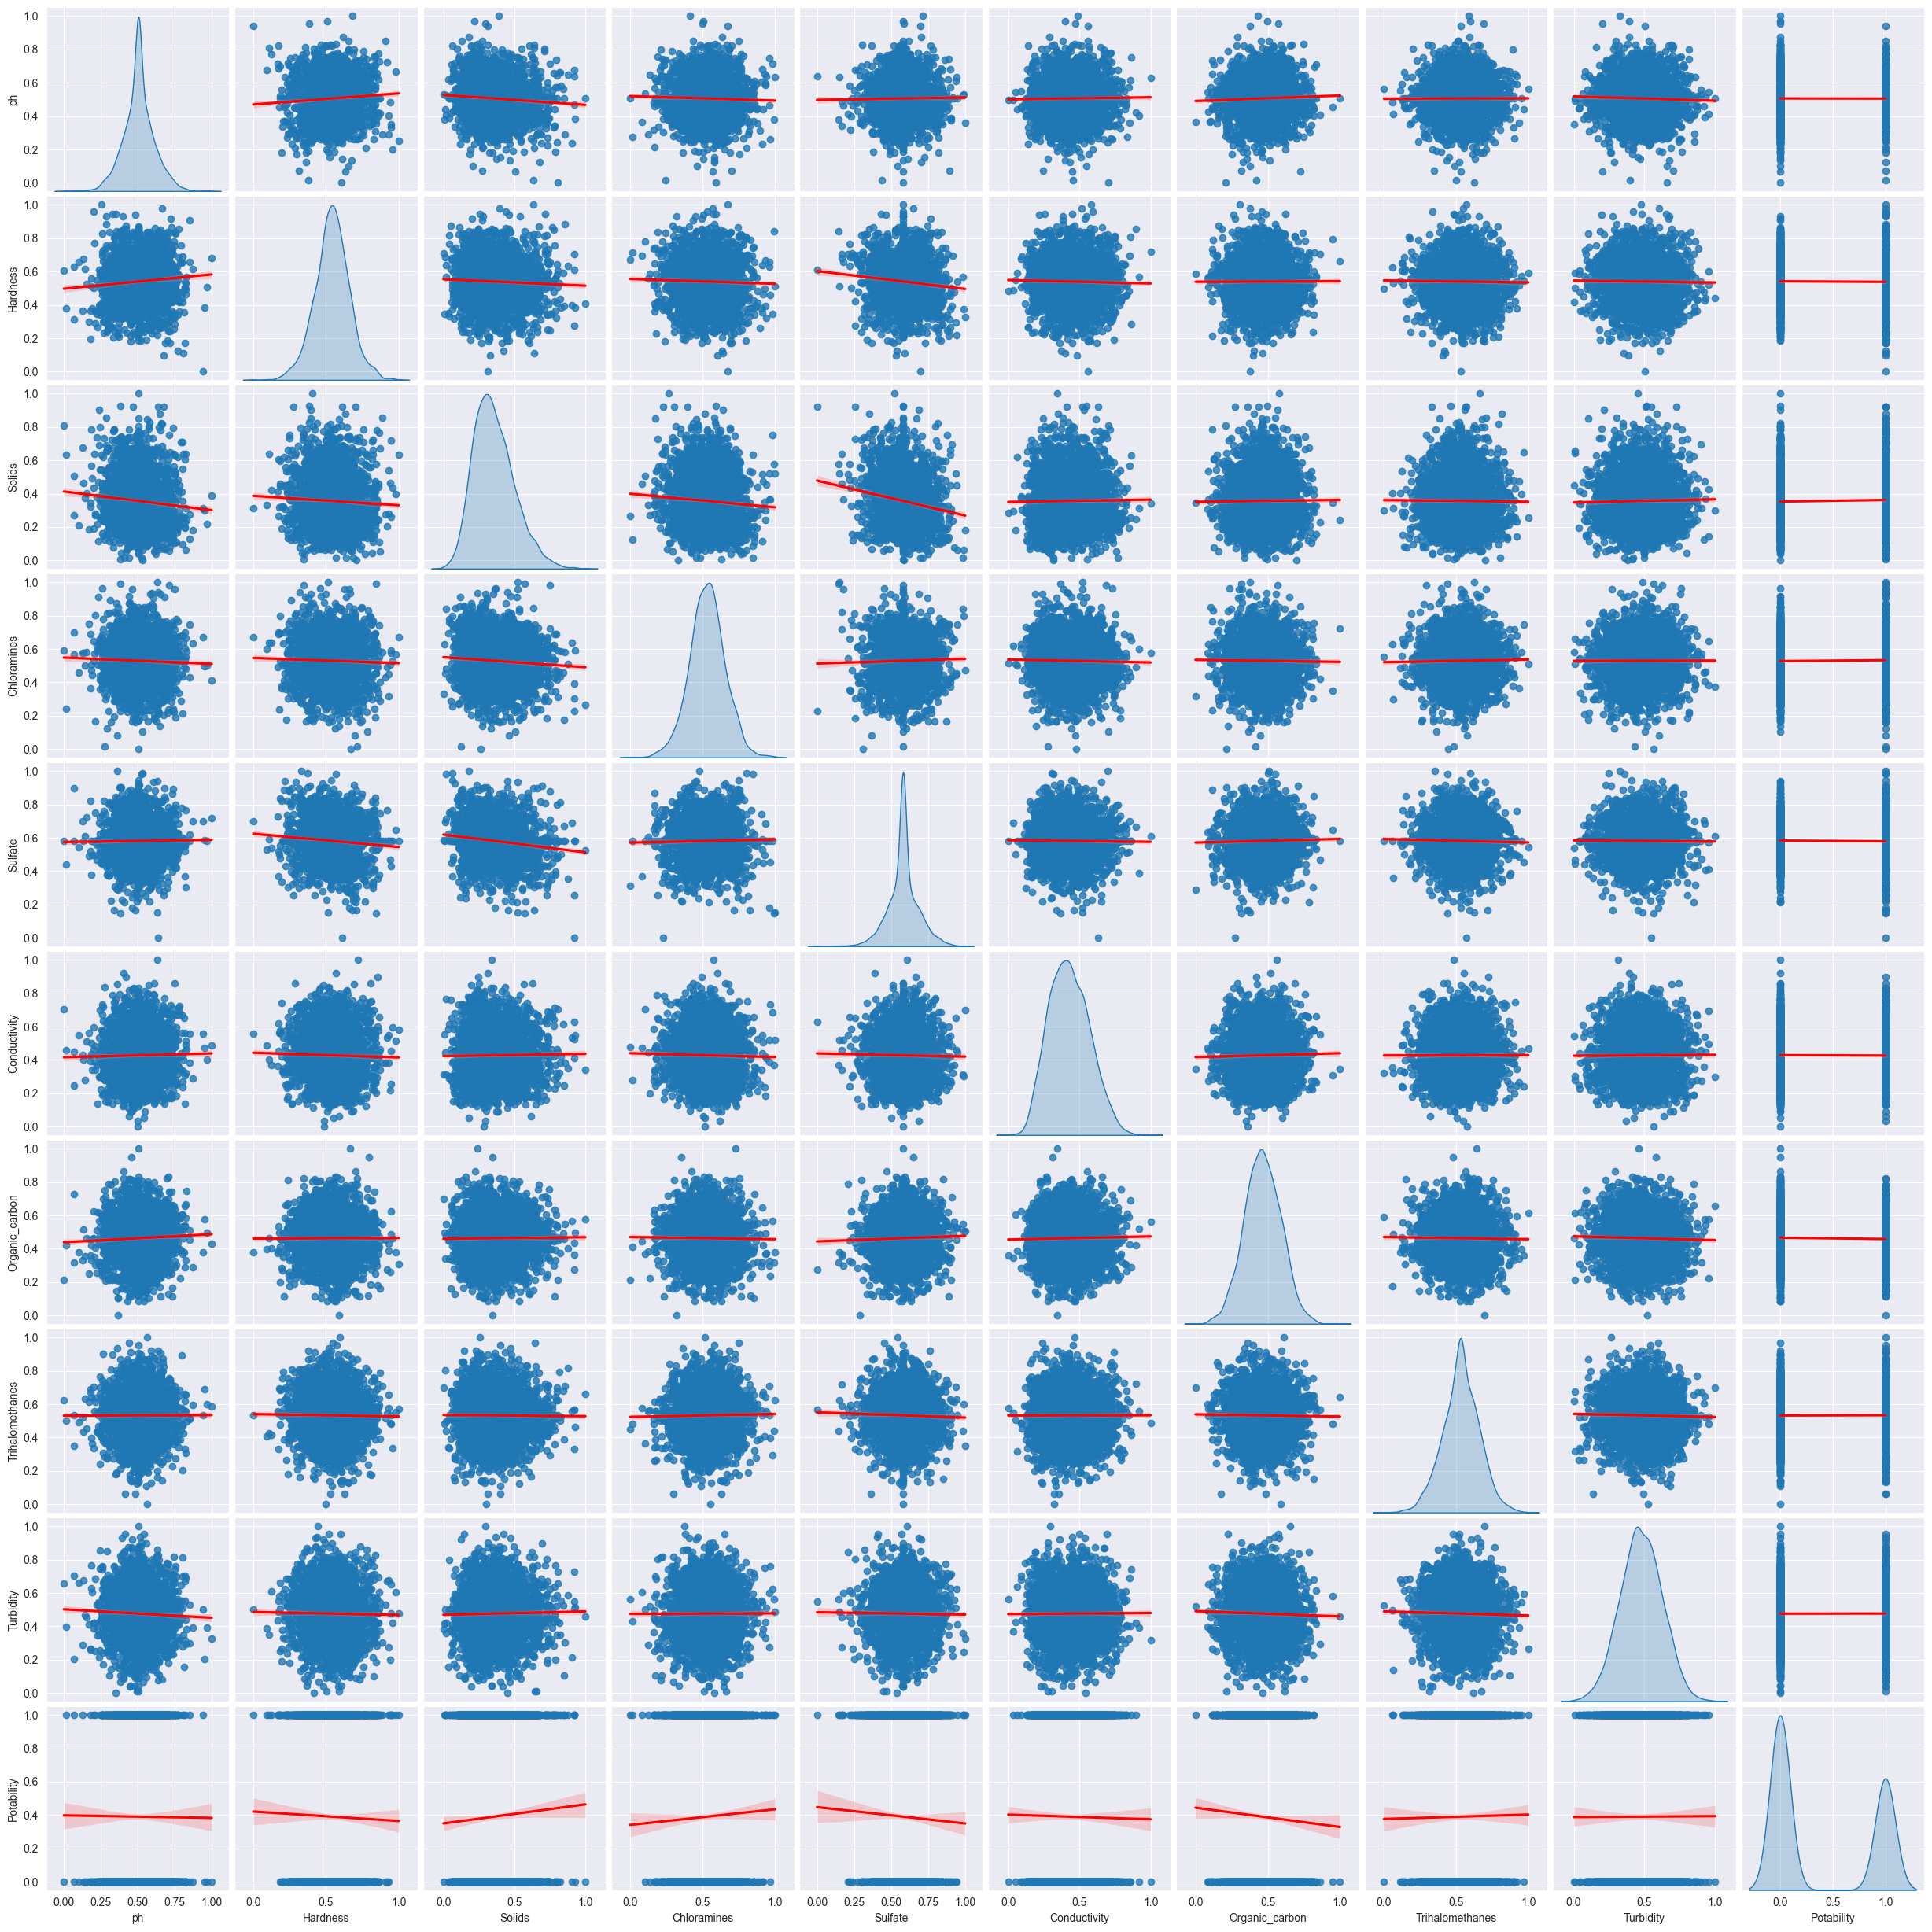

In [131]:
sns.pairplot(data = df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

## Split dataset into train and test data

In [119]:
x = df.drop(['Potability'],axis=True)
y = df['Potability']

x_train,x_test,y_train,y_test = tts(x,y,test_size=0.4, random_state = 10)

In [120]:
print(x.describe())
print("\n\n")
print(y.describe())

                ph     Hardness       Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000  3276.000000  3276.000000  3276.000000   
mean      0.505771     0.540231     0.356173     0.529963     0.581699   
std       0.104997     0.119263     0.143968     0.123921     0.102669   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.448405     0.469432     0.251957     0.452088     0.534313   
50%       0.505771     0.542401     0.338338     0.530591     0.581699   
75%       0.562146     0.613857     0.443498     0.607662     0.628882   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean       0.427940        0.463026         0.532673     0.475853  
std        0.141336        0.126750         0.127938     0.147548  
min        0.000000        0.000000         0.000000     0.00

## Random Forest Classifier

In [121]:
RFC = RandomForestClassifier()
# Build a forest of trees from the training set
RFC.fit(x_train,y_train)
# Predict classes
y_RFC = RFC.predict(x_test)

In [122]:
Acc_rfc = accuracy_score(y_test, y_RFC, normalize=False)
Acc_rfc_norm = accuracy_score(y_test, y_RFC)
print("Predicted:", Acc_rfc, "from", len(y_test))
print(f'Accuracy: {Acc_rfc_norm*100:.2f}%')

Predicted: 878 from 1311
Accuracy: 66.97%


In [123]:
print(classification_report(y_test, y_RFC))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       824
           1       0.59      0.37      0.46       487

    accuracy                           0.67      1311
   macro avg       0.64      0.61      0.61      1311
weighted avg       0.66      0.67      0.65      1311



<Axes: >

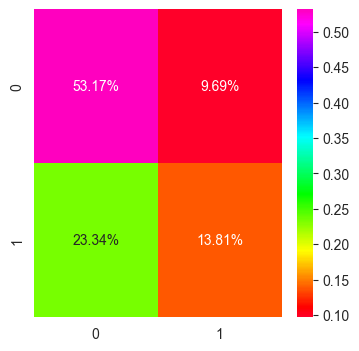

In [124]:
cmr = confusion_matrix(y_test, y_RFC)
sns.heatmap(cmr/np.sum(cmr), annot=True, fmt='0.2%', cmap='gist_rainbow')

## MLP Classifier

In [125]:
MLP = MLPClassifier(alpha=1, max_iter=1000, activation='logistic')
MLP.fit(x_train, y_train)
y_MLP = MLP.predict(x_test)

In [126]:
Acc_mlp = accuracy_score(y_test, y_MLP, normalize=False)
Acc_mlp_norm = accuracy_score(y_test, y_MLP)
print("Predicted:", Acc_mlp, "from", len(y_test))
print(f'Accuracy: {Acc_mlp_norm*100:.2f}%')

Predicted: 824 from 1311
Accuracy: 62.85%


In [127]:
print(classification_report(y_test, y_MLP))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       824
           1       0.00      0.00      0.00       487

    accuracy                           0.63      1311
   macro avg       0.31      0.50      0.39      1311
weighted avg       0.40      0.63      0.49      1311



E:\BSU\оов\labone\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\BSU\оов\labone\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\BSU\оов\labone\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

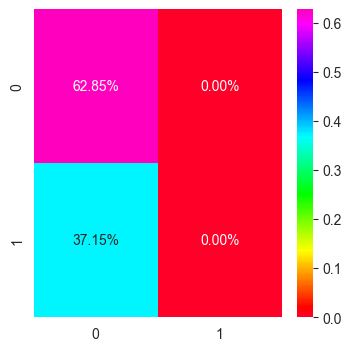

In [128]:
cmr = confusion_matrix(y_test, y_MLP)
sns.heatmap(cmr/np.sum(cmr), annot=True, fmt='0.2%', cmap='gist_rainbow')